# 导入所需的库

In [1]:
from pynq import Overlay
from pynq import Xlnk
import pynq.lib.dma
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 手动归一化（无法在PYNQ里运行torchvision.transform）

In [2]:
def my_transform(img):
    img = img.resize((28,28))
    im_data = np.array(img).astype(np.float32)
    im_data = im_data.transpose(2,0,1)
    for i in range(im_data.shape[0]):
        im_data[i,:,:] = (im_data[i,:,:] - np.mean(im_data[i,:,:])) / np.std(im_data[i,:,:])
    return im_data

# 载入Overlay，定义dma的输入输出通道

In [3]:
overlay = Overlay('overlay/cnn_new.bit')
xlnk = Xlnk()
x = xlnk.cma_array(shape=(3,28,28), dtype=np.float32)
y = xlnk.cma_array(shape=(6), dtype=np.float32)

input_ch = overlay.axi_dma_0.sendchannel
output_ch = overlay.axi_dma_0.recvchannel

# 载入图片，实际测试时应为摄像头拍到的图片

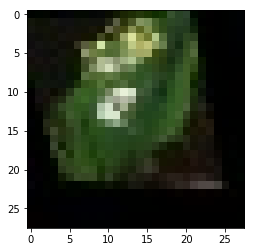

In [4]:
img = Image.open('dataset_flower/class3/5.jpg')
plt.imshow(img)
plt.show()
img_data = my_transform(img)
for i in range(3):
    for j in range(28):
        for k in range(28):
            x[i][j][k] = img_data[i][j][k]

# 得到输出

In [5]:
input_ch.transfer(x)
output_ch.transfer(y)
output_ch.wait()
print('y', y)
print('pred class: ', np.argmax(y))

y [ -8.97259045  -3.98325133  -4.07571602 -11.80711746  -6.12692976
  -7.52348709]
pred class:  1


In [6]:
def test(class_name,pic_id):
    
    overlay = Overlay('overlay/cnn_new.bit')
    xlnk = Xlnk()
    x = xlnk.cma_array(shape=(3,28,28), dtype=np.float32)
    y = xlnk.cma_array(shape=(6), dtype=np.float32)

    input_ch = overlay.axi_dma_0.sendchannel
    output_ch = overlay.axi_dma_0.recvchannel
    
    img = Image.open('dataset_flower/class%s/%s.jpg'%(class_name+1,pic_id))
#     plt.imshow(img)
#     plt.show()
    img_data = my_transform(img)
    for i in range(3):
        for j in range(28):
            for k in range(28):
                x[i][j][k] = img_data[i][j][k]
    input_ch.transfer(x)
    output_ch.transfer(y)
    output_ch.wait()
#     print('y', y)
    print('real class: ',class_name,' pred class: ', np.argmax(y))
    

In [7]:
for i in range(6):
    for j in [5,6]:
        test(i,j)

real class:  0  pred class:  0
real class:  0  pred class:  0
real class:  1  pred class:  1
real class:  1  pred class:  1
real class:  2  pred class:  1
real class:  2  pred class:  2
real class:  3  pred class:  3
real class:  3  pred class:  3
real class:  4  pred class:  5
real class:  4  pred class:  4
real class:  5  pred class:  5
real class:  5  pred class:  5
